# 1.0 Full Exploratory Data Analysis

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
path.hello()

hello petter 😎


## Libraries

In [3]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Process data

### Read data

In [4]:
input_covid_file = path.data_raw_dir("time_series_covid19_confirmed_global.csv")

WindowsPath('d:/Documentos/Clases/Platzi/Escuela DS/configuracion de entorno trabajo/final_project/data/raw/time_series_covid19_confirmed_global.csv')

In [8]:
covid_df = pd.read_csv(input_covid_file)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 607 entries, Province/State to 9/15/21
dtypes: float64(2), int64(603), object(2)
memory usage: 1.3+ MB


In [9]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,153534,153626,153736,153840,153962,153982,153990,154094,154180,154283
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,151499,152239,153318,154316,155293,156162,157026,157436,158431,159423
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,198313,198645,198962,199275,199560,199822,200068,200301,200528,200770
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15069,15070,15070,15078,15083,15083,15083,15096,15099,15108
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,48790,49114,49349,49628,49943,50348,50446,50738,51047,51407


### Process data

In [10]:
processed_df = (
    covid_df
    .select_columns(["Country/Region", "*/*/*"])
    .pivot_longer(
        index="Country/Region",
        names_to="date"
    )
    .transform_column("date", pd.to_datetime)
    .clean_names()
)

processed_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Save output data

In [11]:
output_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [12]:
processed_df.to_csv(output_covid_file, index=False)

## Explore data

### Read data

In [13]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [14]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168237 entries, 0 to 168236
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  168237 non-null  object
 1   date            168237 non-null  object
 2   value           168237 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [15]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [16]:
sns.set_style("whitegrid")

In [17]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [18]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
6,Argentina,2020-01-22,0
30,Brazil,2020-01-22,0
57,Chile,2020-01-22,0


Plot time series.

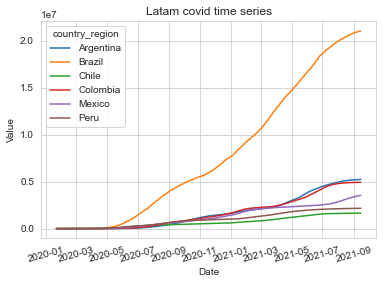

In [19]:
sns.lineplot(
    data=some_latam_countries_df,
    x="date",
    y="value",
    hue="country_region"
)

plt.xticks(rotation=15)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Latam covid time series")

#### Latam in global context

Top `n` countries.

In [20]:
top_countries_df = (
    processed_covid_df
    .select_columns(["country_region", "value"])
    .groupby(["country_region"])
    .aggregate("sum")
    .sort_values("value", ascending=False)
    .reset_index()
    .head(20)
    .transform_column(
        column_name="country_region",
        function=lambda x: "red" if x in countries else "lightblue",
        dest_column_name="color"
    )
)

top_countries_df.head()

,country_region,value,color
0,US,9947416163,lightblue
1,India,6629604119,lightblue
2,Brazil,4758911471,red
3,Russia,1584208513,lightblue
4,France,1532231073,lightblue


Plot to Latam in highlighted bars.

In [21]:
def covid_time_series(df):
        sns.lineplot(
            data=df,
            x="date",
            y="value",
            hue="country_region"
        )

        plt.xticks(rotation=15)
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.title("Latam covid time series")

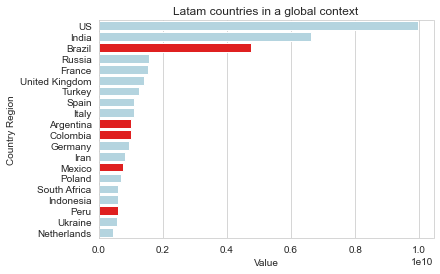

In [22]:
sns.barplot(
    data=top_countries_df,
    x="value",
    y="country_region",
    palette=top_countries_df.color
)

plt.xlabel("Value")
plt.ylabel("Country Region")
plt.title("Latam countries in a global context")

## Usando nuestras funciones desde visualize

In [23]:
import final_project.visualization.visualize as visualize

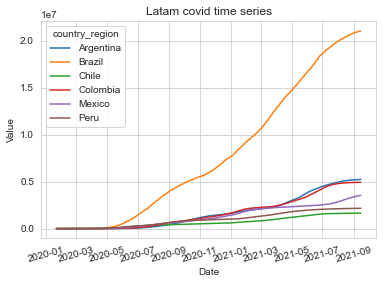

In [24]:
visualize.covid_time_series(some_latam_countries_df)

In [25]:
visualize.top_countries(processed_covid_df, countries,11)

,country_region,value,color
0,US,9947416163,lightblue
1,India,6629604119,lightblue
2,Brazil,4758911471,red
3,Russia,1584208513,lightblue
4,France,1532231073,lightblue
5,United Kingdom,1400397223,lightblue
6,Turkey,1248491726,lightblue
7,Spain,1115001527,lightblue
8,Italy,1112084594,lightblue
9,Argentina,1019543819,red
